# House Price Prediction Notebook
---

![](https://s3.eu-north-1.amazonaws.com/ammar-files/kaggle-kernels/House+Price+Prediction+%7C+An+End-to-End+Machine+Learning+Project/header-img.jpg)

<p>&nbsp;</p>

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set(style="ticks")

# plot.rc function is used to the rc params. Using this , you can by default set the properties of a plot.
plt.rc('figure', figsize=(6, 3.7), dpi=100) # figure size
plt.rc('axes', labelpad=20, facecolor="#ffffff", # properties of axes
       linewidth=0.4, grid=True, labelsize=10) 
plt.rc('xtick.major', width=0.2) # major ticks where the lavels are shown
plt.rc('ytick.major', width=0.2) # minor ticks where the labels are not shown
plt.rc('grid', color='#EEEEEE', linewidth=0.25)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('savefig', pad_inches=0.3, dpi=300)

<h1 id="data-prep">Data  Preparation</h1>

In this study, we will use a housing dataset presented by De Cock (2011). This dataset describes the sales of residential units in Ames, Iowa starting from 2006 until 2010. The dataset contains a large number of variables that are involved in determining a house price. We obtained a csv copy of the data from https://www.kaggle.com/prevek18/ames-housing-dataset.

## Data Description

The dataset contains `2930` records (rows) and `82` features (columns).

Here, we will provide a brief description of dataset features. Since the number of features is large (82), we will attach the original data description file to this paper for more information about the dataset (It can be downloaded also from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Now, we will mention the feature name with a short description of its meaning.

|Feature|Description|
|-------|-----------|
|MSSubClass| The type of the house involved in the sale|
|MSZoning| The general zoning classification of the sale|
|LotFrontage| Linear feet of street connected to the house|
|LotArea| Lot size in square feet|
|Street| Type of road access to the house|
|Alley| Type of alley access to the house|
|LotShape| General shape of the house|
|LandContour| House flatness|
|Utilities| Type of utilities available|
|LotConfig| Lot configuration|
|LandSlope| House Slope|
|Neighborhood| Locations within Ames city limits|
|Condition1| Proximity to various conditions|
|Condition2| Proximity to various conditions (if more than one is present)|
|BldgType| House type|
|HouseStyle| House style|
|OverallQual| Overall quality of material and finish of the house|
|OverallCond| Overall condition of the house|
|YearBuilt| Construction year|
|YearRemodAdd| Remodel year (if no remodeling nor addition, same as YearBuilt)|
|RoofStyle| Roof type|
|RoofMatl| Roof material|
|Exterior1st| Exterior covering on house|
|Exterior2nd| Exterior covering on house (if more than one material)|
|MasVnrType| Type of masonry veneer|
|MasVnrArea| Masonry veneer area in square feet|
|ExterQual| Quality of the material on the exterior|
|ExterCond| Condition of the material on the exterior|
|Foundation| Foundation type|
|BsmtQual| Basement height|
|BsmtCond| Basement Condition|
|BsmtExposure| Refers to walkout or garden level walls|
|BsmtFinType1| Rating of basement finished area|
|BsmtFinSF1| Type 1 finished square feet|
|BsmtFinType2| Rating of basement finished area (if multiple types)|
|BsmtFinSF2| Type 2 finished square feet|
|BsmtUnfSF| Unfinished basement area in square feet|
|TotalBsmtSF| Total basement area in square feet|
|Heating| Heating type|
|HeatingQC| Heating quality and condition|
|CentralAir| Central air conditioning|
|Electrical| Electrical system type|
|1stFlrSF| First floor area in square feet|
|2ndFlrSF| Second floor area in square feet|
|LowQualFinSF| Low quality finished square feet in all floors|
|GrLivArea| Above-ground living area in square feet|
|BsmtFullBath| Basement full bathrooms|
|BsmtHalfBath| Basement half bathrooms|
|FullBath| Full bathrooms above ground|
|HalfBath| Half bathrooms above ground|
|Bedroom| Bedrooms above ground|
|Kitchen| Kitchens above ground|
|KitchenQual| Kitchen quality|
|TotRmsAbvGrd| Total rooms above ground (excluding bathrooms)|
|Functional| Home functionality|
|Fireplaces| Number of fireplaces|
|FireplaceQu| Fireplace quality|
|GarageType| Garage location|
|GarageYrBlt| Year garage was built in|
|GarageFinish| Interior finish of the garage|
|GarageCars| Size of garage (in car capacity)|
|GarageArea| Garage size in square feet|
|GarageQual| Garage quality|
|GarageCond| Garage condition|
|PavedDrive| How driveway is paved|
|WoodDeckSF| Wood deck area in square feet|
|OpenPorchSF| Open porch area in square feet|
|EnclosedPorch| Enclosed porch area in square feet|
|3SsnPorch| Three season porch area in square feet|
|ScreenPorch| Screen porch area in square feet|
|PoolArea| Pool area in square feet|
|PoolQC| Pool quality|
|Fence| Fence quality|
|MiscFeature| Miscellaneous feature|
|MiscVal| Value of miscellaneous feature|
|MoSold| Sale month|
|YrSold| Sale year|
|SaleType| Sale type|
|SaleCondition| Sale condition|

#### MSZoning : https://www.codepublishing.com/CA/Concord/html/Concord18/Concord1830.html


## Reading the Dataset

The first step is reading the dataset from the csv file we downloaded. We will use the `read_csv()` function from `Pandas` Python package:

In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("../input/AmesHousing.csv")
data_copy = dataset.copy()

In [3]:
data_copy.head()

## Getting A Feel of the Dataset

Let's display the first few rows of the dataset to get a feel of it:

In [4]:
# Configuring float numbers format
pd.options.display.float_format = '{:20.2f}'.format
dataset.head()

Now, let's get statistical information about the numeric columns in our dataset. We want to know the mean, the standard deviation, the minimum, the maximum, and the 50th percentile (the median) for *each numeric column* in the dataset:

In [5]:
dataset.info()

In [6]:
dataset.describe().transpose()

Now , for understanding the percentiles column
Take the example of Lot Area , 50% percentile value is 11555.25. It means that 50% of the values of the column Lot Area is less than 11555.25(which is also the median). 
25% percentile value is 7440.25 , means 25% of total values of Lot Area column is less than 7440.25

In [7]:
dataset.describe(include=[np.number], percentiles=[.25]) \
    .transpose().drop("count", axis=1)

From the table above, we can see, for example, that the average lot area of the houses in our dataset is 10,147.92 ft<sup>2</sup> with a standard deviation of 7,880.02 ft<sup>2</sup>. We can see also that the minimum lot area is 1,300 ft<sup>2</sup> and the maximum lot area is 215,245 ft<sup>2</sup> with a median of 9,436.5 ft<sup>2</sup>. Similarly, we can get a lot of information about our dataset variables from the table.

Then, we move to see statistical information about the non-numerical columns in our dataset:

In [8]:
dataset.describe(include=[np.object]).transpose()

In [9]:
dataset.head()

In [10]:
dataset["MS Zoning"].unique()

In [11]:
dataset["MS Zoning"].nunique()

In [12]:
dataset.isnull().sum()

In the table we got, `count` represents the number of non-null values in each column, `unique` represents the number of unique values, `top` represents the most frequent element, and `freq` represents the frequency of the most frequent element.

## Data Cleaning

### Dealing with Missing Values

We should deal with the problem of missing values because some machine learning models don't accept data with missing values. Firstly, let's see the number of missing values in our dataset. We want to see the number and the percentage of missing values for each column that actually contains missing values.

In [13]:
# Getting the number of missing values in each column
num_missing = dataset.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

Now we start dealing with these missing values.

##### Pool QC

The percentage of missing values in `Pool QC` column is 99.56% which is very high. Seeing this very high percentage , you will think that `Pool QC` is of no use. But wait a minute.Such a high missing value can be interpreted as the corresponding house doesn't have a pool. To verify this, let's take a look at the values of `Pool Area` column:

In [14]:
dataset["Pool Area"].value_counts()

We can see that there are 2917 entries in `Pool Area` column that have a value of 0. This verfies our hypothesis that each house without a pool has a missing value in `Pool QC` column and a value of 0 in `Pool Area` column. So let's fill the missing values in `Pool QC` column with `"No Pool"`:

In [15]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

In [16]:
dataset['Pool QC'].unique()

##### Misc Feature

The percentage of missing values in `Misc Feature` column is 96.38% which is very high also. Let's take a look at the values of `Misc Val` column:

In [17]:
dataset['Misc Feature'].value_counts()

In [18]:
dataset["Misc Val"].value_counts()

We can see that `Misc Val` column has 2827 entries with a value of 0. `Misc Feature` has 2824 missing values. Then, as with `Pool QC`, we can say that each house without a "miscellaneous feature" has a missing value in `Misc Feature` column and a value of 0 in `Misc Val` column. So let's fill the missing values in `Misc Feature` column with `"No Feature"`:

In [19]:
dataset['Misc Feature'].fillna('No feature',inplace=True)
dataset['Misc Feature'].unique()

##### Alley,  Fence, and Fireplace Qu

According to the dataset documentation, `NA` in `Alley`, `Fence`, and `Fireplace Qu` columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with `"No Alley"`, `"No Fence"`, and `"No Fireplace"` accordingly:

In [20]:
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

##### Lot Frontage

As we saw previously, `Lot Frontage` represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and we fill in the missing values with 0:

In [21]:
dataset['Lot Frontage'].fillna(0, inplace=True)

##### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

According to the dataset documentation, `NA` in `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Type` indicates that there is no garage in the house. So we fill in the missing values in these columns with `"No Garage"`. We notice that `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Yr Blt` columns have 159 missing values, but `Garage Type` has 157 and both `Garage Cars` and `Garage Area` have one missing value. Let's take a look at the row that contains the missing value in `Garage Cars`:

In [22]:
dataset.columns

In [23]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")] # containing all the garage columns 
garage_columns

In [24]:
dataset[garage_columns].isna().sum()

In [25]:
df = dataset[dataset['Garage Cars'].isna()]
df[garage_columns]

We can see that this is the same row that contains the missing value in `Garage Area`, and that all garage columns except `Garage Type` are null in this row, so we will fill the missing values in `Garage Cars` and `Garage Area` with 0.

We saw that there are 2 rows where `Garage Type` is not null while `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Yr Blt` columns are null. Let's take a look at these two rows:

In [26]:
dataset[~pd.isna(dataset['Garage Type']) & 
        pd.isna(dataset['Garage Qual'])][garage_columns] # as all garage values are null except garage type ,so we fill the garage type with no garage

We will replace the values of `Garage Type` with `"No Garage"` in these two rows also.

For `Garage Yr Blt`, we will fill in missing values with 0 since this is a numerical column:

In [27]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)

In [28]:
dataset.loc[~pd.isna(dataset['Garage Type']) &
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"
dataset.loc[[1356,2236],"Garage Type"]

In [29]:
for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)
    
dataset['Garage Yr Blt'].fillna(0, inplace=True)

##### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1


According to the dataset documentation, `NA` in any of the first five of these columns indicates that there is no basement in the house. So we fill in the missing values in these columns with `"No Basement"`. We notice that the first five of these columns have 80 missing values, but `BsmtFin Type 2` has 81, `Bsmt Exposure` has 83, `Bsmt Half Bath` and `Bsmt Full Bath` each has 2, and each of the others has 1. Let's take a look at the rows where `Bsmt Half Bath` is null:

In [30]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]

In [31]:
dataset[bsmt_columns].isna().sum()

In [32]:
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

We can see that these are the same rows that contain the missing values in `Bsmt Full Bath`, and that one of these two rows is contains the missing value in each of `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns. We notice also that `Bsmt Exposure`, `BsmtFin Type 2`, `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are null in these rows, so we will fill the missing values in `Bsmt Half Bath`, `Bsmt Full Bath`, `Total Bsmt SF`, `Bsmt Unf SF`, `BsmtFin SF 2`, and `BsmtFin SF 1` columns with 0.

We saw that there are 3 rows where `Bsmt Exposure` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null. Let's take a look at these three rows:

In [33]:
dataset[~pd.isna(dataset['Bsmt Cond']) &
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

We will fill in the missing values in `Bsmt Exposure` for these three rows with `"No"`. According to the dataset documentation, `"No"` for `Bsmt Exposure` means "No Exposure":

Let's now take a look at the row where `BsmtFin Type 2` is null while `BsmtFin Type 1`, `Bsmt Qual`, and `Bsmt Cond` are not null:

In [34]:
dataset[~pd.isna(dataset['Bsmt Cond']) &
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

We will fill in the missing value in `BsmtFin Type 2` for this row with `"Unf"`. According to the dataset documentation, `"Unf"` for `BsmtFin Type 2` means "Unfinished":

In [35]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF",
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) & 
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2", 
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

##### Mas Vnr Area and Mas Vnr Type

Each of these two columns have 23 missing values. We will fill in these missing values with `"None"` for `Mas Vnr Type` and with 0 for `Mas Vnr Area`. We use `"None"` for `Mas Vnr Type` because in the dataset documentation, `"None"` for `Mas Vnr Type` means "None" (i.e. no masonry veneer):

In [36]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

##### Electrical

This column has one missing value. We will fill in this value with the mode of this column:

In [37]:
dataset['Electrical'].mode()

In [38]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

Now let's check if there is any remaining missing value in our dataset:

In [39]:
dataset.isna().values.sum()

In [40]:
dataset.head()

This means that our dataset is now complete; it doesn't contain any missing value anymore.

## Outlier Removal
Plotting `SalePrice` against `Gr Liv Area` to spot the outliers.

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

We can clearly see the five outliers in the plot. Now, we will remove them from our dataset. We can do so by keeping data points that have `Gr Liv Area` less than 4,000. But first we take a look at the dataset rows that correspond to these unusual values:

In [42]:
outlirt_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlirt_columns]

Now we remove them:

In [43]:
dataset = dataset[dataset["Gr Liv Area"] < 4000]

In [44]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

To avoid problems in modeling later, we will reset our dataset index after removing the outlier rows, so no gaps remain in our dataset index:

In [45]:
dataset.reset_index(drop=True, inplace=True)

## Deleting Some Unimportant Columns

We will delete columns that are not useful in our analysis. The columns to be deleted are `Order` and `PID`. That is because all the values existing in these columns are unique for every row , so it doesnt play any role in the affecting the SalePrice

In [47]:
dataset[['Order','PID']].head()

In [48]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

<h1 id="eda">Exploratory Data Analysis</h1>

In this section, we will explore the data using visualizations. This will allow us to understand the data and the relationships between variables better, which will help us build a better model.

## Target Variable Distribution

Our dataset contains a lot of variables, but the most important one for us to explore is the target variable. We need to understand its distribution. First, we start by plotting the violin plot for the target variable. The width of the violin represents the frequency. This means that if a violin is the widest between 300 and 400, then the area between 300 and 400 contains more data points than other areas:

In [49]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1(25%), Q2(50%) (the median), and Q3(75%). Now let's see the box plot of `SalePrice`:

In [50]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9"); # you can interpret whisker as the length of these lines above which outliers will be seen 
# default value is 1.5 , thus length of these lines will be 1.5 * IQR

This shows us the minimum and maximum values of `SalePrice`. It shows us also the three quartiles represented by the box and the vertical line inside of it. Lastly, we plot the histogram of the variable to see a more detailed view of the distribution:

In [52]:
sns.distplot(dataset['SalePrice'], kde=True, 
             color="#172B4D", hist_kws={"alpha": 0.5});
plt.ylabel("Count");

Violin Plot is just basically the combination of boxplot and distplot.
How much the wide the violin plot is ,shows the histogram part and the percentile of values among the quartiles shows the boxplot part

Lets see another interesting example of violin plot.
Suppose I want to find distribution of Overall Qual with the SalePrice and its quartiles.

In [53]:
dataset.head()

In [54]:
dataset['Alley'].unique()

In [55]:
dataset[dataset['Lot Shape']=='IR3'].Alley

In [56]:
sns.violinplot(x=dataset['Lot Shape'],y=dataset['SalePrice'],hue=dataset.Alley)

In the above plot , we can interpret multiple kinds of informations in one go like the histogram distribution , quartiles distribution, how the Sale Price changes with respect to Lot Shape and Alley

## Correlation Between Variables

We want to see how the dataset variables are correlated with each other and how predictor variables are correlated with the target variable. For example, we would like to see how `Lot Area` and `SalePrice` are correlated: Do they increase and decrease together (positive correlation)? Does one of them increase when the other decrease or vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

We will show correlation between our dataset variables (numerical and boolean variables only) using a heatmap graph:

In [57]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(dataset.corr(),ax=ax,annot=True);

In [58]:
sns.scatterplot(x=dataset['Garage Cars'],y=dataset['Garage Area'])

We can see that there are many correlated variables in our dataset. We notice that `Garage Cars` and `Garage Area` have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. We see also that `Gr Liv Area` and `TotRms AbvGrd` are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too. 

Regarding negative correlation, we can see that `Bsmt Unf SF` is negatively correlated with `BsmtFin SF 1`, and that makes sense because when we have more unfinished area, this means that we have less finished area. We note also that `Bsmt Unf SF` is negatively correlated with `Bsmt Full Bath` which is reasonable too.

Most importantly, we want to look at the predictor variables that are correlated with the target variable (`SalePrice`). By looking at the last row of the heatmap, we see that the target variable is highly positively correlated with `Overall Qual` and `Gr Liv Area`. We see also that the target variable is positively correlated with `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`.

### Relatioships Between the Target Variable and Other Varibles

#### High Positive Correlation

Firstly, we want to visualize the relationships between the target variable and the variables that are highly and positively correlated with it, according to what we saw in the heatmap. Namely, these variables are `Overall Qual` and `Gr Liv Area`. We start with the relationship between the target variable and `Overall Qual`, but before that, let's see the distribution of each of them. Let's start with the target variable `SalePrice`:

In [60]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.5});
plt.ylabel("Count");

We can see that most house prices fall between 100,000 and 200,000. We see also that there is a number of expensive houses to the right of the plot. Now, we move to see the distribution of `Overall Qual` variable:

In [61]:
sns.distplot(dataset['Overall Qual'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

We see that `Overall Qual` takes an integer value between 1 and 10, and that most houses have an overall quality between 5 and 7. Now we plot the scatter plot of `SalePrice` and `Overall Qual` to see the relationship between them:

In [59]:
plt.scatter(x=dataset['Overall Qual'], y=dataset['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

We can see that they are truly positively correlated; generally, as the overall quality increases, the sale price increases too. This verfies what we got from the heatmap above.

Now, we want to see the relationship between the target variable and `Gr Liv Area` variable which represents the living area above ground. Let us first see the distribution of `Gr Liv Area`:

In [62]:
sns.distplot(dataset['Gr Liv Area'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that the above-ground living area falls approximately between 800 and 1800 ft<sup>2</sup>. Now, let us see the relationship between `Gr Liv Area` and the target variable:

In [63]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'], 
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

The scatter plot above shows clearly the strong positive correlation between `Gr Liv Area` and `SalePrice` verifying what we found with the heatmap.

#### Moderate Positive Correlation

Next, we want to visualize the relationship between the target variable and the variables that are positively correlated with it, but the correlation is not very strong. Namely, these variables are `Year Built`, `Year Remod/Add`, `Mas Vnr Area`, `Total Bsmt SF`, `1st Flr SF`, `Full Bath`, `Garage Cars`, and `Garage Area`. We start with the first four. Let us see the distribution of each of them:

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add",
                             "Mas Vnr Area", "Total Bsmt SF"]):
    print(ax,v)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add",
                             "Mas Vnr Area", "Total Bsmt SF"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

Now let us see their relationships with the target variable using scatter plots:

PairGrid function is used for plotting the pairwise relationships in the dataset

In [ ]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

Next, we move to the last four. Let us see the distribution of each of them:

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1st Flr SF", "Full Bath", 
                             "Garage Cars", "Garage Area"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

And now let us see their relationships with the target variable:

In [ ]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

From the plots above, we can see that these eight variables are truly positively correlated with the target variable. However, it's apparent that they are not as highly correlated as `Overall Qual` and `Gr Liv Area`.

### Relationships Between Predictor Variables

#### Positive Correlation

Apart from the target variable, when we plotted the heatmap, we discovered a high positive correlation between `Garage Cars` and `Garage Area` and between `Gr Liv Area` and `TotRms AbvGrd`. We want to visualize these correlations also. We've already seen the distribution of each of them except for `TotRms AbvGrd`. Let us see the distribution of `TotRms AbvGrd` first:

In [ ]:
sns.distplot(dataset['TotRms AbvGrd'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

Now, we visualize the relationship between `Garage Cars` and `Garage Area` and between `Gr Liv Area` and `TotRms AbvGrd`:

In [ ]:
# hist2d just makes the 2d histogram plot(range of values of one column with respect to other column)
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"], 
                    dataset["Garage Area"],
                    cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"], 
                    dataset["TotRms AbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

We can see the strong correlation between each pair. For `Garage Cars` and `Garage Area`, we see that the highest concentration of data is when `Garage Cars` is 2 and `Garage Area` is approximately between 450 and 600 ft<sup>2</sup>. For `Gr Liv Area` and `TotRms AbvGrd`, we notice that the highest concentration is when `Garage Liv Area` is roughly between 800 and 2000 ft<sup>2</sup> and `TotRms AbvGrd` is 6.

#### Negative Correlation

When we plotted the heatmap, we also discovered a significant negative correlation between `Bsmt Unf SF` and `BsmtFin SF 1`, and between `Bsmt Unf SF` and `Bsmt Full Bath`. We also want to visualize these correlations. Let us see the distribution of these variables first:

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D", 
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

Now, we visualize the relationship between each pair using scatter plots:

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

From the plots, we can see the negative correlation between each pair of these variables.

We will use the information we got from exploratory data analysis in this section, we will use it in feature engineering in the next section.

## Feature Engineering

In this section, we will use the insights from Exploratory Data Analysis section to engineer the features of our dataset.

### Creating New Derived Features

Firstly, we noticed a high positive correlation between the target variable `SalePrice` and each of `Overall Qual` and `Gr Liv Area`. This gives an indication that the latter two features are very important in predicting the sale price. So, we will create polynomial features out of these features: For each one of these features, we will derive a feature whose values are the squares of original values, and another feature whose values are the cubes of original values. Moreover, we will create a feature whose values are the product of our two features values:

In [64]:
# It is done to increase the influence of these two values in the target predictor to get the better prediction results
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = \
    dataset["Overall Qual"] * dataset["Gr Liv Area"]

In [65]:
dataset.head()

We have also noticed that some features other than target feature are very much correlated with each other. So to avoid [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) problem, we will delete one of those highly correlated features from the dataset.
For ex: `Garage Cars` anf `Garage Area` , `Gr Liv Area` and `TotRms AbvGrd` etc.

In [ ]:
corr_matrix = dataset.corr()
corr_matrix.iloc[0]['SalePrice']

In [66]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j])>threshold):
                # Below codes are written to remove that column from the pair which has less correlation with the target variable
                if (abs(corr_matrix.iloc[i]['SalePrice'])>abs(corr_matrix.iloc[j]['SalePrice'])):
                    colname = corr_matrix.columns[j]
                    col_corr.add(colname)
                else:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
    return col_corr

In [67]:
corr_features = correlation(dataset,0.9)
corr_features

In [68]:
dataset = dataset.drop(corr_features,axis=1)

In [69]:
len(dataset.columns)

### Dealing with Ordinal Variables

There are some ordinal features in our dataset. For example, the `Bsmt Cond` feature has the following possible values: 

Ordinal Variable are those categorical variables whose value of the ranks matters.

In [70]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Where "Gd" means "Good", "TA" means "Typical", "Po" means "Poor", "Fa" means "Fair", and "Ex" means "Excellent" according to the dataset documentation. But the problem is that machine learning models will not know that this feature represents a ranking. As the quality of the basement condition increases/improves, the SalePrice value increases but without considering this ranking , ML model will treat all of them as equal and will be treated as other categorical features. So to solve this issue, we will map each one of the possible values of this feature to a number. We will map `"No Basement"` to 0, `"Po"` to 1, `"Fa"` to 2, `"TA"` to 3, `"Gd"` to 4, and `"Ex"` to 5.

The ordinal features in the dataset are: `Exter Qual`, `Exter Cond`, `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2`, `Heating QC`, `Central Air`, `Kitchen Qual`, `Functional`, `Fireplace Qu`, `GarageFinish`, `Garage Qual`, `Garage Cond`, `Pool QC`, `Land Slope` and `Fence`. We will map the values of each of them to corresponding numbers as described for `Bsmt Cond` above and in accordance with the dataset documentation:

In [71]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

### One-Hot Encoding For Categorical Features

Machine learning models accept only numbers as input, and since our dataset contains categorical features, we need to encode them in order for our dataset to be suitable for modeling. We will encode our categorical features using one-hot encoding technique which transforms the categorical variable into a number of binary variables based on the number of unique categories in the categorical variable; each of the resulting binary variables has only 0 and 1 as its possible values. Pandas package provides a convenient function `get_dummies()` that can be used for performing one-hot encoding on our dataset.

To see what will happen to our dataset, let us take for example the variable `Paved Drive` which indicates how the driveway is paved. It has three possible values: `Y` which means for "Paved", `P` which means "Partial Pavement", and `N` which means "Dirt/Gravel". Let us take a look at `Paved Drive` value for the first few rows in our dataset:

In [72]:
dataset[['Paved Drive']].head()

Now, we perform one-hot encoding:

In [73]:
dataset = pd.get_dummies(dataset)

Let us see what has happened to the `Paved Drive` variable by looking at the same rows above: 

In [74]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

We can see for example that a value of `P` in the original `Paved Drive` column is converted to 1 in `Paved Drive_P` and zeros in `Paved Drive_N` and `Paved Drive_Y` after one-hot encoding.

All categorical column are converted in the same way.

Now, after we have cleaned and prepared our dataset, it is ready for modeling.


In [75]:
dataset.head()

In [76]:
dataset.shape

# Some Additional Feature engineering , selection , data visualisation technqiues

#### Skewness of the data

In [ ]:
data_copy.head()

In [ ]:
sns.distplot(data_copy['Gr Liv Area'],kde=True)

You can see that tail of the line is longer in the right side , so the data is positive skewed.

Skewness is just a measure of asymmetry of distribution. More the symmetrical the data is , more good is the accuracy.

In [ ]:
data_copy['Gr Liv Area'].skew()

Symmetric Distribution =>        -0.5<s<0.5

Moderate Skewness      =>      -1<s<0.5, 0.5<s<1

Highly unseymmetric    =>        s<-1, s>1
distribution         

Where s represents the skewness of a data.

As you can see that our data is highly unsymmetric or highly skewed , so we can prevent this by using log tranformation or sqrt tranformation or box-cox transformation

In [ ]:
log_trans = np.log(data_copy['Gr Liv Area'])
sqrt_trans = np.sqrt(data_copy['Gr Liv Area'])
from scipy import stats
boxcox = stats.boxcox(data_copy['Gr Liv Area']) # boxcox only applies when data is positive
boxcox_df = pd.Series(boxcox[0])

In [ ]:
for x,y in zip([0,1,2],[log_trans,sqrt_trans,boxcox_df]):
    print(y.skew())

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, [log_trans,sqrt_trans,boxcox_df]):
    sns.distplot(v, kde=True, color="#172B4D", 
                 hist_kws={"alpha": 0.5}, ax=ax);
    ax.set(ylabel="Count")
    print(v.skew())

You can see that the most symmetric and less skewed data is obtained after boxcox transformation. So we will use this tranformation for the modeling purposes.

### Detecting the outliers using Z-Score

In [ ]:
from scipy import stats
outlier_score = pd.Series(stats.zscore(data_copy['Gr Liv Area']))

Whenever the zscore is >3 or <-3 , then it means outlier is present

In [ ]:
outlier_score[(outlier_score>3) | (outlier_score<-3)]

## Feature Selection using Chi2 Test

A Chi-Square test is a test of statistical significance for categorical variables. It helps to understand whether there is correlation between two independent categorical columns.

Lets take an exmaple here
Suppose I want to know that whether the placements of the students in college has some correlation with their CGPAs.
So we will get this data from some source. So now the question arises, that , are the frequencies of that we have observed in this data follow some pattern or its just coming randomly. So to answer this question, Chi square test comes into play.

CGPA  |  Observed Frequencies
<br>
10-9  |   30
<br>
9-8   |   35
<br>
8-7   |   20
<br>
7-6   |   10
<br>
Below
6     |   5
<br>

But we expect that there is no correlation between them so the students are equally distributed among different cgpa's ranges.
So we expect 20 students for every cgpa range.

NULL Hypothesis : The observed frequencies are similar to the expected frequencies
Alternate Hypothesis : The observed frequencies are different from expected frequencies.

Lets calculate Chi2 value. 
Formula is 
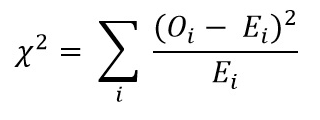

X2 = Chi-Square Value
Oi = Observed Frequency
Ei = Expected Frequency

Chi2 = 32.5
Now we have calculated it , we need to compare it with critical chi-square value. We can find this in chi-square table against degrees of freedom (=number of categories-1) and the level of signifance.

Null Hypothesis(H0) = The observed and expected frequencies are not significantly different.
Alternate Hypothesis(Ha) = The observed and expected frequencies are significantly different.

Now, suppose the level of significance(consider it as some threshold) = 0.05.

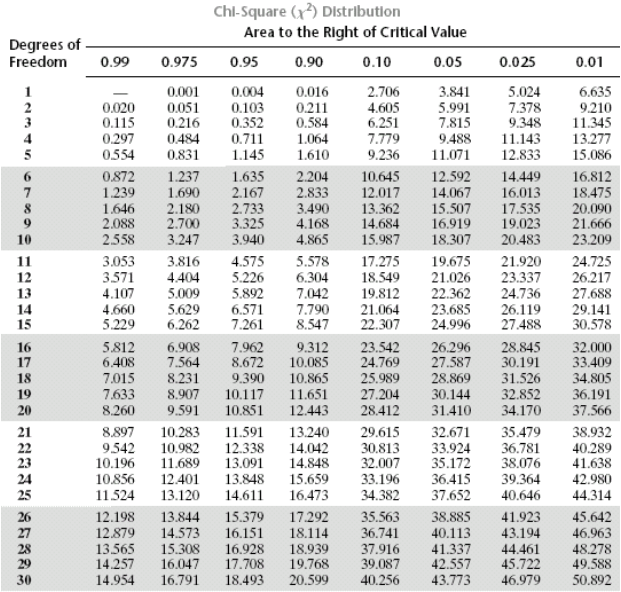

In this case, the degrees of freedom are 5-1 = 4. So, the critical value at 5% level of significance is 9.49.

Our obtained value of 32.5 is much larger than the critical value of 9.49. Therefore, we can say that the observed frequencies are significantly different from the expected frequencies. In other words, C.G.P.A is related to the number of placements that occur in the department of statistics.

Similarly we can do this for two independent categorical variables.

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df.head()

In [3]:
cat_df = df.select_dtypes(include=np.object)
cat_df = cat_df.drop('customerID',axis=1)
cat_df["gender"]=cat_df["gender"].map({"Female":1,"Male":0})
cat_df["Contract"]=cat_df["Contract"].map({'Month-to-month':0, 'One year':1, 'Two year':2})
cat_df["PaperlessBilling"]=cat_df["PaperlessBilling"].map({"Yes":0,"No":1})
cat_df.head()

In [4]:
from sklearn.feature_selection import chi2
x=cat_df.iloc[:,:-1]  #Independent variable
y=cat_df.iloc[:,-1]   #Target variable
f_score,p_value=chi2(x,y)   #returns f score and p value 
p_value

Greater the f_score or lesser the p_value , the more important is the feature.
Here , you can see highest p_value exist for the column `gender`. So it is the least correlated column with target column and thus we can remove this column from our analysis.

## Feature Scaling

In order to make all algorithms work properly with our data, we need to scale the features in our dataset. For that, we will use a helpful function named `StandardScaler()` from the popular Scikit-Learn Python package. This function standardizes features by subtracting the mean and scaling to unit variance. It works on each feature independently. For a value $x$ of some feature $F$, the `StandardScaler()` function performs the following operation:

\begin{equation*}
z = \frac{x - \mu}{s}
\end{equation*}

where $z$ is the result of scaling $x$, $\mu$ is the mean of feature $F$, and $s$ is the standard deviation of $F$. 

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
# # scaler = MinMaxScaler()
# # We need to fit the scaler to our data before transformation (Always remember that we never standardise or normalise target variable)
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(
    dataset.loc[:, dataset.columns != 'SalePrice'])

In [78]:
dataset.head()

In [79]:
dataset.describe()

<h1 id="pred-type">Prediction Type and Modeling Techniques</h1>

In this section, we choose the type of machine learning prediction that is suitable to our problem. We want to determine if this is a regression problem or a classification problem. In this project, we want to predict the *price* of a house given information about it. The price we want to predict is a continuous value; it can be any real number. This can be seen by looking at the target variable in our dataset `SalePrice`:

That means that the prediction type that is appropriate to our problem is **regression**.

Now we move to choose the modeling techniques we want to use. There are a lot of techniques available for regression problems like Linear Regression, Ridge Regression, Artificial Neural Networks, Decision Trees, Random Forest, etc. In this project, we will test many modeling techniques, and then choose the technique(s) that yield the best results. The techniques that we will try are:

### 1. Simple Linear Regression

This technique models the relationship between the target variable and the independent variables (predictors). It fits a linear model with coefficients to the data in order to minimize the residual sum of squares between the target variable in the dataset, and the predicted values by the linear approximation.
This model is optimised after applying regularization such as (lasso)L1 and (ridge)L2

### 2. Decision Trees

For this technique, the goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. An example of a simple decision tree for predicting who survived when the Titanic sank is shown in Figure 8:

![Figure 8: Predicting who survived when the Titanic sank](https://s3.eu-north-1.amazonaws.com/ammar-files/kaggle-kernels/House+Price+Prediction+%7C+An+End-to-End+Machine+Learning+Project/8.png)

### 3. Random Forest

Bagging is an ensemble method where many base models are used with a randomized subset of data to reduce the variance of a the base model.

### 4. Gradient Boosting

Boosting is also an ensemble method where weak base models are used to create a strong model that reduces bias and variance of the base model.

Each one of these techniques has many algorithmic implementation. *We will choose algorithm(s) for each of these techniques* in the next section.

<h1 id="model-building">Model Building and Evaluation</h1>

In this part, we will build our prediction model: we will choose algorithms for each of the techniques we mentioned in the previous section. After we build the model, we will evaluate its performance and results.


In [ ]:
dataset[['SalePrice']].head()

## Splitting the Dataset

As usual for supervised machine learning problems, we need a training dataset to train our model and a test dataset to evaluate the model. So we will split our dataset randomly into two parts, one for training and the other for testing. For that, we will use another function from Scikit-Learn called `train_test_split()`:

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('SalePrice', axis=1), dataset[['SalePrice']],
    test_size=0.25, random_state=3)

We specified the size of the test set to be 25% of the whole dataset. This leaves 75% for the training dataset. Now we have four subsets: `X_train`, `X_test`, `y_train`, and `y_test`. Later we will use `X_train` and `y_train` to train our model, and `X_test` and `y_test` to test and evaluate the model. `X_train` and `X_test` represent features (predictors); `y_train` and `y_test` represent the target. From now on, we will refer to `X_train` and `y_train` as the training dataset, and to `X_test` and `y_test` as the test dataset. Figure 10 shows an example of what `train_test_split()` does.

![Figure 10: train_test_split() operation](https://s3.eu-north-1.amazonaws.com/ammar-files/kaggle-kernels/House+Price+Prediction+%7C+An+End-to-End+Machine+Learning+Project/10.png)

## Modeling Approach

For each one of the techniques mentioned in the previous section (Linear Regression, Nearest Neighbor, Support Vector Machines, etc.), we will follow these steps to build a model:

- Choose an algorithm that implements the corresponding technique
- Search for an effective parameter combination for the chosen algorithm
- Create a model using the found parameters
- Train (fit) the model on the training dataset
- Test the model on the test dataset and get the results

### Searching for Effective Parameters

Using Scikit-Learn, we can build a decision-tree model for example as follows:

```py
model = DecisionTreeRegressor(max_depth=14, min_samples_split=5, max_features=20)
```

We can do this but to probably achieve a better performance if we choose better values for the parameters `max_depth`, `min_samples_split`, and `max_features`. To do so, we will examine many parameter combinations and choose the combination that gives the best score. Scikit-Learn provides a useful function for that purpose: `GridSearchCV()`. So for the example above, we will do the following:

```py
parameter_space = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}

clf = GridSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                   scoring="neg_mean_absolute_error")
                   
clf.fit(X_train, y_train)
```

The code above will test the decision-tree model using all the parameter combinations. It will use *cross validation* with 4 folds and it will use the mean absolute error for scoring and comparing different parameter combinations. At the end, it will provide us with the best parameter combination that achieved the best score so we can use it to build our model.

Sometimes, when the number of parameter combinations is large, `GridSearchCV()` can take very long time to run. So in addition to `GridSearchCV()`, we will sometimes use `RandomizedSearchCV()` which is similar to `GridSearchCV()` but instead of using all parameter combinations, it picks a number of random combinations specified by `n_iter`. For the example above, we can use `RandomizedSearchCV()` as follows:

```py
clf = RandomizedSearchCV(DecisionTreeRegressor(), parameter_space, cv=4, 
                         scoring="neg_mean_absolute_error", n_iter=100)
```
This will make `RandomizedSearchCV()` pick 100 parameter combinations randomly.

## Performance Metric

For evaluating the performance of our models, we will use mean absolute error (MAE). If $\hat{y}_i$ is the predicted value of the $i$-th element, and $y$ is the corresponding true value, then for all $n$ elements, RMSE is calculated as:

\begin{equation*}
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|.
\end{equation*}

## Modeling

### Linear Regression

For Linear Regression, we will choose three algorithmic implementations: Simple , Ridge and Lasso. We will use the implementations provided in the Scikit-Learn package of these algorithms.

#### 1. Simple linear regression

In [81]:
X_train.head()

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
reg = LinearRegression().fit(X_train,y_train)
# reg.predict(X_train)

In [83]:
# The coefficients
# What do you think the length of the coefficients of the reg model should be ?
print("Coefficients: \n", len(reg.coef_[0]))

In [84]:
y_pred = reg.predict(X_test)
print("Mean squared error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

In [85]:
sns.distplot(y_pred-y_test)

#### 2. Ridge Regression(L2 Regularization)

The basic difference between linear and ridge regression is of the cost function. The Ridge regression uses the linear regression cost function with a extra term i.e.. alpha(regularisation parameter) * (slope)^2.
This model basically helps in avoid overfitting using the regularisation technique.

This model has the following syntax:

```py
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, 
      max_iter=None, tol=0.001, solver=’auto’, random_state=None)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. 
The parameter `alpha` represents the regularization strength, `fit_intercept` determines whether to calculate the intercept for this model, and `solver` controls which solver to use in the computational routines.

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Ridge model with the best parameters found:

In [87]:
ridge_model = Ridge(random_state=3,**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [88]:
ridge_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [91]:
y_pred = ridge_model.predict(X_test)
y_pred.shape

In [89]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)
r2 = r2_score(y_test,y_pred)
print("Ridge R2 =",r2)

In [92]:
sns.distplot(y_pred-y_test)

#### 3. Lasso Regression(L1 Regularization)

Lasso Regression basically differs from the linear regression in cost function. In its cost function , it has an extra term alpha * abs(slope).
This model helps to overcome overfitting problem as well as perform feature selection.

In [93]:
from sklearn.linear_model import Lasso
parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False]
}
lasso = GridSearchCV(Lasso(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

lasso.fit(X_train, y_train)
print("Best parameters:")
print(lasso.best_params_)

In [94]:
lasso_model = Lasso(random_state=3, **lasso.best_params_)
lasso_model.fit(X_train, y_train);
from sklearn.metrics import mean_absolute_error

y_pred = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, y_pred)
print("Lasso MAE =", lasso_mae)
r2 = r2_score(y_test,y_pred)
print("Lasso R2 =",r2)

In [ ]:
y_pred.shape

In [ ]:
y_predict = y_pred.reshape([y_pred.shape[0],1])
y_predict.shape

In [ ]:
sns.distplot(y_predict-y_test)

### Decision Tree

It is a tool that has applications spanning several different areas. Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

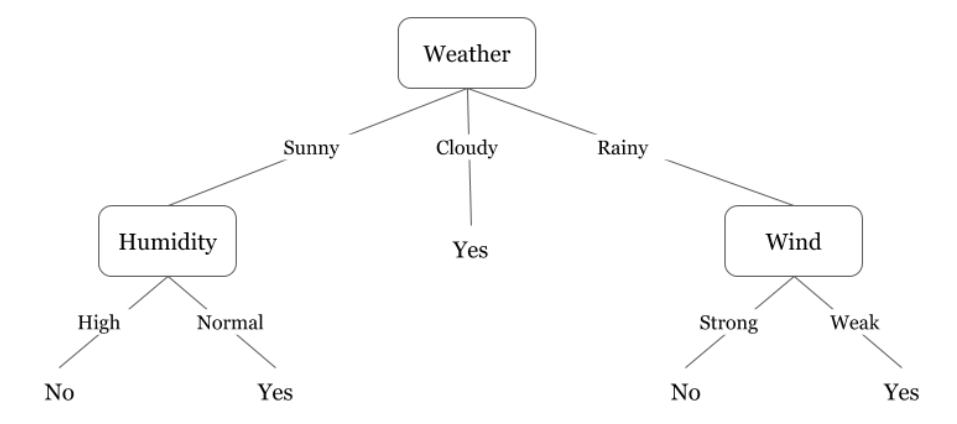

#### Entropy

Now to decide how much the node is pure or the uncertainty/impurity of the node, we use the metric Entropy.

The formula for Entropy is shown below:

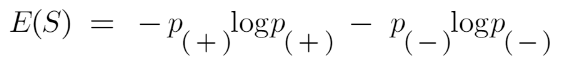

p– is the probability of negative class

S is the subset of the training example

Now considering your previous knowledge , entropy means the degree of randomness. A pure subpslit means that either we are getting only 'yes' or 'no'. 

#### Information Gain
Now our goal is to decrease the uncertainty of node at each split. So for measuring this decrease in the uncertainty/entropy, we use the metric Information Gain.

Information gain measures the reduction of uncertainty given some feature and it is also a deciding factor for which attribute should be selected as a decision node or root node.

The formula for this is 

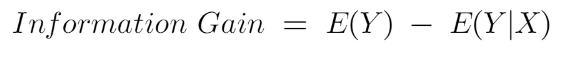

For understanding how it is useful, lets take an example

Suppose we need to predict whether he/she will go to gym or not. For this, we split the dataset using two features, first using`Energy` feature and then using `Motivation` feature.

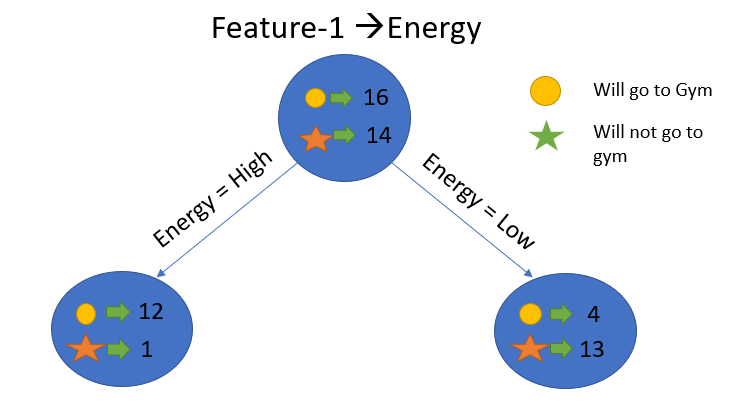

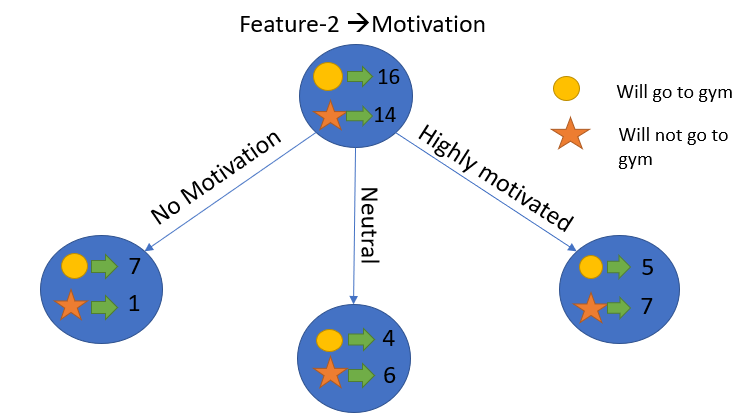

Suppose the decrease in entropy/information gain of first split comes out to be greater than that of second split. Thus , we will use the feature `Energy` for first splitting of the dataset. Like this , we calculate the information gain wrt every feature and select that feature which gives the best possible split.

For knowing the calculation part , refer to this [blog](https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/) post of analytics vidhya.

#### Implementation
For Decision Tree (DT), we will use an implementations provided by the Scikit-Learn package.

The Decision Tree model has the following syntax:

```py
DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=None, 
                      random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, presort=False)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `criterion` specifies the function used to measure the quality of a split, `min_samples_split` determines the minimum number of samples required to split an internal node, `min_samples_leaf` determines the minimum number of samples required to be at a leaf node, and `max_features` controls the number of features to consider when looking for the best split.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space,
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

We defined the parameter space above using reasonable values for chosen parameters. Then we used `GridSearchCV()` with 3 folds (`cv=3`). Now we build our Decision Tree model with the best parameters found:

In [ ]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
dt_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE = ", dt_mae)
print("Decision Tree R2 = ",r2_score(y_test,y_pred))


### Random Forest

RandomForest is basically a bagging(also known as Bootstrap Aggregation) ensembling technique which combines multiple decision trees algorithms for prediction. In bagging actually, row sampling and feature sampling is done to select multiple sample of rows and features with replacement(bootstrap) for different DT models and then multiple DT models are trained on those samples. After training , every model prediction is either combined by majority voting(in classification) or by taking mean or median(in regression).This step involving combining the individual models is known as aggregation.

#### Why Random Forest Works?
Now the real question is why this ensembling i.e.. combining multiple DT models works much better than individual DT models?
DT models basically have low bias and high variance(overfitting). 
Low bias here means that the DT models are perfectly trained on the training dataset and thus gives low error on the training dataset.
High variance here means that predictions are done on a completely new dataset by these DT models, then the accuracy comes out be worse. 
Thus by combining different DT models, the variance of the combined model becomes very low and thats the main reason why ensembling works.

Another advantage is that if the training dataset is changed a little bit , then also the combined model will give a good accuracy because the combined variance is always low. So you can say that Random Forest is one of the best Machine Learning Models that you can use for a dataset.

#### Important hyperparameters

Following hyperparameters increases the predictive power:

1. n_estimators– number of trees the algorithm builds before averaging the predictions.

2. max_features– maximum number of features random forest considers splitting a node.

3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

Following hyperparameters increases the speed:

1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

For Further understanding , refer to this [blog](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) post of analytics vidhya 

#### Implementation
For Random Forest (RF), we will use an implementations provided by the Scikit-Learn package.

The Random Forest model has the following syntax:

```py
RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features=’auto’, 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, oob_score=False, 
                      n_jobs=None, random_state=None, verbose=0, warm_start=False)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `n_estimators` specifies the number of trees in the forest, `bootstrap` determines whether bootstrap samples are used when building trees. `criterion`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` are the same as those of the decision tree model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

In [ ]:
clf.best_score_

We defined the parameter space above using reasonable values for chosen parameters. Then we used `RandomizedSearchCV()` with 3 folds (`cv=3`). Now we build our Random Forest model with the best parameters found:

In [ ]:
rf_model = RandomForestRegressor(**clf.best_params_,oob_score=True)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
rf_model.fit(X_train, y_train);

In [ ]:
rf_model.oob_score_

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)
print("r2_score =",r2_score(y_test,y_pred))

### Gradient Boosting

#### Boosting
Gradient Boosting works on the principle of boosting technique.The principle behind boosting algorithms is that first we build a model on the training dataset and then a second model is built to rectify the errors present in the first model.

For example , suppose we have a dataset of n training examples. First we make a model and find predictions , then we calculate the errors of the predictions with respect to the actual target values. The misclassified examples are given higher weights and others are given less weight.Then we give this weighted dataset in the second model and then the second model specifically focus on those examples which are misclassified by the first model because of higher weights given. So repeating this technique, we get a much higher accuracy.

#### Working of Gradient Boosting Algorithm(Basic Intuition)
Suppose we are taking the example of a GradientBoosting Regressor. 

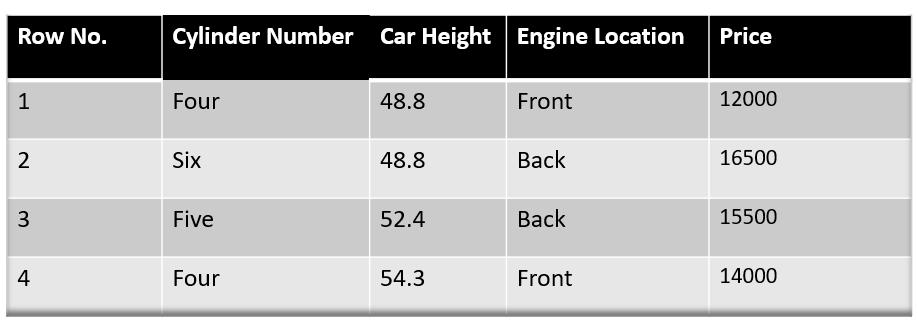

**Step 1:** In the above example, we will be predicting the value of price. First we build a base model which just predicts a value average of all the target values. Here, it comes out to be 14500.

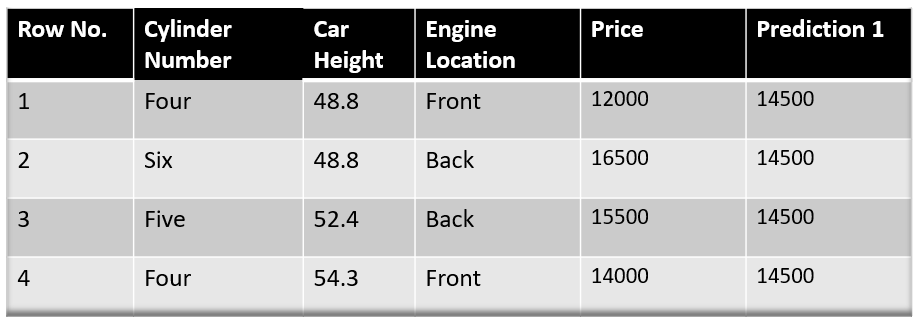

**Step 2:** Next step is to calculate the pseudo residuals which is having the formula (observed value - predicted value).

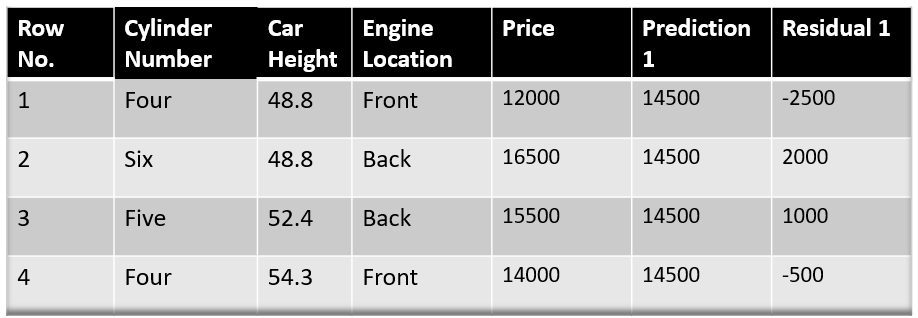

**Step 3:** Next step is to train a DT model on this residual error i.e.. features will be the same as before but our target column now becomes the residual errors.So the prediction of this model will not be the price , but it will be the errors.

**Step 4:** Last step is to update the predictions of the previous model to get the final predictions.

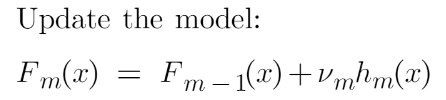

hm(x) is the prediction of mth decision tree model and nu-m is the learning rate(to avoid overfitting), Fm-1(x) is the predictions of the previous models,Fm(x) is the new predictions.
For ex: new prediction = previous prediction  + learning rate                        *   error predicted by DT
                       = 14500                + (0.1 -> generally lies between 0-1)      (-2500)     
                       = 14250
                       
Above steps are repeated and multiple decision tree models are made upto the extent when errors predicted by the final model is nearly zero. 

For knowing about the mathematical formulation of this model , refer to this [blog](https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/) post of analytics vidhya.

XGBoost Algorithm , also known as Xtreme Gradient Boosting Algorithm is just the modification of this gradient boosting algorithm which includes L1 and L2 regularization, parallel learning for faster computing derivatives etc.To know more , refer to this [blog](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/) post of analytics vidhya.


As XGBoost is one of the best algorithm for regression , so we will now see the implementation of this algorithm under gradient boosting.

XGBoost model has the following syntax:

```py
XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
             objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, 
             gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
             colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
             missing=None, importance_type='gain', **kwargs)
```

Firstly, we will use `GridSearchCV()` to search for the best model parameters in a parameter space provided by us. The parameter `max_depth` sets the maximum depth of a tree, `learning_rate` represents the step size shrinkage used in updating weights, `n_estimators` specifies the number of boosted trees to fit, `booster` determines which booster to use, `gamma` specifies the minimum loss reduction required to make a further partition on a leaf node of the tree, `subsample` is subsample ratio of the training instances; this subsampling will occur once in every boosting iteration, `colsample_bytree` specifies the subsample ratio of columns when constructing each tree, `colsample_bylevel` specifies the subsample ratio of columns for each split, in each level, `reg_alpha` is L1 regularization term, and `reg_lambda` is L2 regularization term.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

We defined the parameter space above using reasonable values for chosen parameters. Then we used `RandomizedSearchCV()` with 3 folds (`cv=3`). Now we build our XGBoost model with the best parameters found:

In [ ]:
xgb_model = XGBRegressor(**clf.best_params_)

Then we train our model using our training set (`X_train` and `y_train`):

In [ ]:
xgb_model.fit(X_train, y_train);

Finally, we test our model on `X_test`. Then we evaluate the model performance by comparing its predictions with the actual true values in `y_test` using the MAE metric as we described above:

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, y_pred)
print("XGBoost MAE =", xgb_mae)
print("r2_score =",r2_score(y_test,y_pred))

<h1 id="analysis-comparison">Analysis and Comparison</h1>

In the previous section, we created many models: for each model, we searched for good parameters then we constructed the model using those parameters, then trained (fitted) the model to our training data (`X_train` and `y_train`), then tested the model on our test data (`X_test`) and finally, we evaluated the model performance by comparing the model predictions with the true values in `y_test`. We used the mean absolute error (MAE) to evaluate model performance. 

Using the results we got in the previous section, we present a table that shows the mean absolute error (MAE) for each model when applied to the test set `X_test`. The table is sorted ascendingly according to MAE score.

|Model                            |MAE      |
|---------------------------------|---------|
|Simple Linear Regression         |15947.96 |
|Ridge                            |15270.46 |
|Lasso                            |15207.50 |
|Random Forest                    |14506.46 |
|Decision Tree                    |20873.95 |
|XGBoost                          |12556.68 |


We also present a graph that visualizes the table contents:

In [ ]:
x = ['Simple Linear Regression', 'Ridge','Lasso','Decision Tree', 
      'Random Forest', 'XGBoost']
y = [15947.96, 15270.46, 15207.50, 20873.95, 14506.46,
     12556.68]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

By looking at the table and the graph, we can see that XGBoost model has the smallest MAE, `12556.68` followed by Random Forest model with a little larger error of `14506.46`. 
So, in our experiment, the best model is XGBoost and the worst model is Decisiom Trees. We can see that the difference in MAE between the best model and the worst model is significant; the best model has almost half of the error of the worst model.

## Performance Interpretation

We chose the mean absolute error (MAE) as our performance metric to evaluate and compare models. MAE presents a value that is easy to understand; it shows the average value of model error. For example, for our XGBoost model, its MAE is `12556.68` which means that on average, XGBoost will predict a value that is bigger or smaller than the true value by `12556.68`. Now to understand how good this MAE is, we need to know the range and distribution of the data. In our case, we need to see the values of the target variable `SalePrice` which contains the actual house prices. Let's see the violin plot, box plot, and histogram of `SalePrice` in our dataset:

In [ ]:
sns.violinplot(x=dataset['SalePrice'], inner="quartile", color="#36B37E");

In [ ]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

In [ ]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

From the three plots above, we can understand the distribution of `SalePrice`. Now let's get some numerical statistical information about it:

In [ ]:
y_train.describe(include=[np.number])

We can see that the mean is `179,846.69` and the median is `159,895`. We can see also that the first quartile is `128,500`; this means that 75% of the data is larger than this number. Now looking at XGBoost error of `12,556.68`, we can say that an error of about `12,000` is good for data whose mean is `159,895` and whose 75% of it is larger than `128,500`.

## Feature Importances

Some of the models we used provide the ability to see the importance of each feature in the dataset after fitting the model. We will look at the feature importances provided by both XGBoost and Random Forest models. We have 242 features in our data which is a big number, so we will take a look at the 15 most important features.

### XGBoost

Let's discover the most important features as determined by XGBoost model:

In [ ]:
xgb_feature_importances = xgb_model.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Random Forest

Now, let's see the most important features as for Random Forest model:

In [ ]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

### Common Important Features

Now, let us see which features are among the most important features for both XGBoost and Random Forest models, and let's find out the difference in their importance regarding the two models:

In [ ]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
       color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width, 
       color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);